## Name : Sneh Patel
## USC ID: 7566599740
## Github Username : sneh27p

# Text Classification

### (a) In this problem, we are trying to build a classifier to analyze the sentiment of reviews. You are provided with text data in two folders: one folder involves positive reviews, and one folder involves negative reviews

### (b)Data Exploration and Pre-processing

In [1]:
# pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [99]:
import os
import re
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, LSTM, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Input
from keras.models import Sequential

#### i. You can use binary encoding for the sentiments, i.e y = 1 for positive sentiments and y = −1 for negative sentiments. 

#### ii. The data are pretty clean. Remove the punctuation and numbers from the data.

#### iii. The name of each text file starts with cv number. Use text files 0-699 in each class for training and 700-999 for testing.

In [100]:
def load_data(directory, sentiment):
    files = os.listdir(directory)
    data = []
    for file in files:
        with open(os.path.join(directory, file), 'r', encoding='utf-8') as f:
            text = f.read().strip()
            text = re.sub(r'[^\w\s]', '', text)
            text = re.sub(r'\d+', '', text)
            label = 1 if sentiment == 'pos' else 0
            file_number = int(re.search(r'cv(\d+)_', file).group(1))
            data.append((text, label, file_number))
    return pd.DataFrame(data, columns=['review', 'label', 'file_number'])

In [101]:
pos_data = load_data('Data/pos', 'pos')
neg_data = load_data('Data/neg', 'neg')

full_data = pd.concat([pos_data, neg_data], ignore_index=True)

train_data = full_data[full_data['file_number'] <= 699].copy()
test_data = full_data[full_data['file_number'] >= 700].copy()

train_data.drop('file_number', axis=1, inplace=True)
test_data.drop('file_number', axis=1, inplace=True)

In [102]:
full_data

,review,label,file_number
0,assume nothing \nthe phrase is perhaps one of...,1,839
1,plot derek zoolander is a male model \nhe is...,1,34
2,i actually am a fan of the original or so liv...,1,908
3,a movie thats been as highly built up as the t...,1,748
4,good will hunting is two movies in one an i...,1,253
...,...,...,...
1995,synopsis when a meteorite crashlands in the a...,0,159
1996,its now the anniversary of the slayings of jul...,0,85
1997,coinciding with the emerging popularity of mov...,0,81
1998,and now the highflying hong kong style of film...,0,12


In [103]:
pos_data

,review,label,file_number
0,assume nothing \nthe phrase is perhaps one of...,1,839
1,plot derek zoolander is a male model \nhe is...,1,34
2,i actually am a fan of the original or so liv...,1,908
3,a movie thats been as highly built up as the t...,1,748
4,good will hunting is two movies in one an i...,1,253
...,...,...,...
995,one of the funniest carry on movies and the th...,1,588
996,i remember making a pact right after patch ad...,1,734
997,barely scrapping by playing at a nyc piano bar...,1,491
998,if the current trends of hollywood filmmaking ...,1,647


In [104]:
neg_data

,review,label,file_number
0,bad bad \nbad \nthat one word seems to pret...,0,676
1,isnt it the ultimate sign of a movies cinemati...,0,839
2,gordy is not a movie it is a minutelong se...,0,155
3,disconnect the phone line \ndont accept the c...,0,465
4,when robert forster found himself famous again...,0,398
...,...,...,...
995,synopsis when a meteorite crashlands in the a...,0,159
996,its now the anniversary of the slayings of jul...,0,85
997,coinciding with the emerging popularity of mov...,0,81
998,and now the highflying hong kong style of film...,0,12


In [105]:
train_data

,review,label
1,plot derek zoolander is a male model \nhe is...,1
4,good will hunting is two movies in one an i...,1
5,the story of us a rob reiner film is the sec...,1
7,the fighting sullivans contains a major plot...,1
8,george little jonathan lipnicki wants a litt...,1
...,...,...
1995,synopsis when a meteorite crashlands in the a...,0
1996,its now the anniversary of the slayings of jul...,0
1997,coinciding with the emerging popularity of mov...,0
1998,and now the highflying hong kong style of film...,0


In [106]:
test_data

,review,label
0,assume nothing \nthe phrase is perhaps one of...,1
2,i actually am a fan of the original or so liv...,1
3,a movie thats been as highly built up as the t...,1
6,anastasia contains something that has been lac...,1
9,before you read my review you gotta know that...,1
...,...,...
1972,martial arts master steven seagal not to ment...,0
1974,tarzan and the lost city is one of the most ...,0
1981,vegas vacation is the fourth film starring che...,0
1982,seen december at p m at the glenwood m...,0


#### iv. Count the number of unique words in the whole dataset (train + test) and print it out

In [107]:
unique_words = None

def count_unique_words(text_series):
    all_text = ' '.join(text_series)
    
    unique_words = set(all_text.split())
    
    return len(unique_words), unique_words

In [108]:
# len(train_data)

In [109]:
combined_data = pd.concat([train_data, test_data])

all_reviews = combined_data['review']
all_train_reviews = train_data['review']
all_test_reviews = test_data['review']

In [110]:
# print(train_data)

In [111]:
# len(all_reviews)

In [112]:
unique_word_count, unique_words = count_unique_words(all_reviews)
print(f"Number of unique words in the whole dataset: {unique_word_count}")

Number of unique words in the whole dataset: 47037


In [113]:
print("The unique words in the data are \n")
print(unique_words)

The unique words in the data are 

{'hognosed', 'outdoors', 'nicotine', 'tux', 'android', 'pa', 'tarantinolook', 'nova', 'flying', 'surrealist', 'develops', 'prisons', 'epiphanies', 'russ', 'alienripoff', 'arnez', 'criticise', 'accidently', 'mehrjui', 'hallstrom', 'derail', 'niece', 'courageously', 'adopted', 'crunchem', 'positioning', 'botching', 'overly', 'grapple', 'internationals', 'assembled', 'wicca', 'specifications', 'contenders', 'fresher', 'spirituality', 'wows', 'stilettoheeled', 'sharpwitted', 'pis', 'visnjics', 'liked', 'seance', 'zetajones', 'harshly', 'muscular', 'eyecatcher', 'yogi', 'alumni', 'gentile', 'swagger', 'faithfulness', 'unreality', 'humourless', 'skittering', 'contain', 'rowlf', 'veritable', 'empowerment', 'drifters', 'mincemeat', 'hygiene', 'heinleins', 'esmerelda', 'emptor', 'tarnished', 'caraccio', 'adorning', 'clinton', 'flu', 'dumbeddown', 'tomost', 'similarlynamed', 'tolerates', 'glances', 'honours', 'creepily', 'coowner', 'gathers', 'liquefied', 'expr

In [114]:
# This is extra. There were two ways to find the unique word. One was the normal way and other was through Tokenizer. 
# Normal one was shown above and this one is done using tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_reviews)

sequences = tokenizer.texts_to_sequences(all_reviews)

word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens using Tokenizer.")

Found 46737 unique tokens using Tokenizer.


#### v. Calculate the average review length and the standard deviation of review lengths. Report the results.

In [115]:
def calculate_lengths(text_series):
    
    lengths = text_series.apply(lambda text: len(text.split()))
    return lengths

review_lengths = calculate_lengths(all_reviews)


average_length = review_lengths.mean()
std_dev_length = review_lengths.std()


print(f"Average review length: {average_length:.2f}")
print(f"Standard deviation of review lengths: {std_dev_length:.2f}")

Average review length: 644.36
Standard deviation of review lengths: 285.05


In [116]:
# print(review_lengths)

#### vi. Plot the histogram of review lengths.

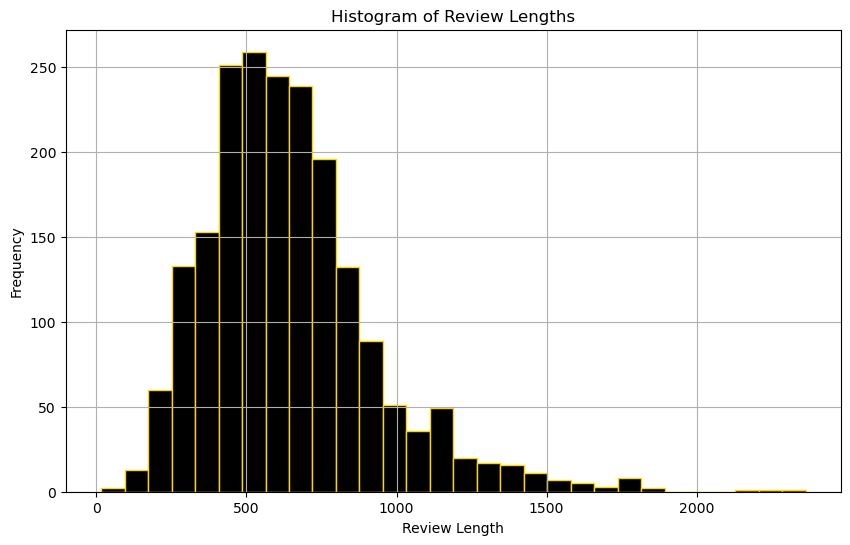

In [117]:
plt.figure(figsize=(10, 6)) 
plt.hist(review_lengths, bins=30, color='black', edgecolor='gold')
plt.title('Histogram of Review Lengths') 
plt.xlabel('Review Length') 
plt.ylabel('Frequency') 
plt.grid(True)  
plt.show() 

#### vii. To represent each text (= data point), there are many ways. In NLP/Deep Learning terminology, this task is called tokenization. It is common to rep-resent text using popularity/ rank of words in text. The most common word in the text will be represented as 1, the second most common word will be represented as 2, etc. Tokenize each text document using this method.

In [118]:
all_train_texts = all_train_reviews
all_test_texts = all_test_reviews

tokenizer = Tokenizer(5000) 
tokenizer.fit_on_texts(all_train_texts)

train_sequences = tokenizer.texts_to_sequences(all_train_texts)

tokenizer2 = Tokenizer(5000)
tokenizer2.fit_on_texts(all_test_texts)

test_sequences = tokenizer.texts_to_sequences(all_test_texts)

word_index = tokenizer.word_index

#### viii. Select a review length L that 70% of the reviews have a length below it. If you feel more adventurous, set the threshold to 90%

In [119]:
L = review_lengths.quantile(0.70)

print(f"The review length L such that 70% of the reviews are shorter than this is: {L}")

The review length L such that 70% of the reviews are shorter than this is: 737.0


#### ix. Truncate reviews longer than L words and zero-pad reviews shorter than L so that all texts (= data points) are of length L


In [120]:
padded_train_sequences = pad_sequences(train_sequences, maxlen=int(L), padding='post', truncating='post')
padded_test_sequences = pad_sequences(test_sequences, maxlen=int(L), padding='post', truncating='post')

# print("Sample of original sequences:", padded_train_sequences[0])
# print("Sample of padded/truncated sequences:", padded_sequences[0])

In [121]:
print(len(padded_test_sequences))
print(len(test_data['label']))
print(len(padded_train_sequences))
print(len(train_data['label']))

600
600
1400
1400


### (c) Word Embeddings

#### i. One can use tokenized text as inputs to a deep neural network. However, a recent breakthrough in NLP suggests that more sophisticated representations of text yield better results. These sophisticated representations are called word embeddings. “Word embedding is a term used for representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning.”. Most deep learning modules(including Keras) provide a convenient way to convert positive integer representations of words into a word embedding by an “Embedding layer.” The layer accepts arguments that define the mapping of words into embeddings, including the maximum number of expected words also called the vocabulary size (e.g. the largest integer value). The layer also allows you to specify the dimension for each word vector, called the “output dimension.” We would like to use a word embedding layer for this project. Assume that we are interested in the top 5,000 words. This means that in each integer sequence that represents each document, we set to zero those integers that represent words that are not among the top 5,000 words in the document.If you feel more adventurous, use all the words that appear in this corpus. Choose the length of the embedding vector for each word to be 32. Hence, each document is represented as a 32 × L matrix.

#### ii. Flatten the matrix of each document to a vector.

In [122]:
labels = combined_data['label']

top_words = 5000

embedding_dim = 32

input_length = L

model = Sequential()

model.add(Embedding(input_dim=top_words, output_dim=embedding_dim, input_length=input_length))

from keras.layers import Flatten, Dense
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/Users/snehpatel/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### (d) Multi-Layer Perceptron

#### i. Train a MLP with three (dense) hidden layers each of which has 50 ReLUs and one output layer with a single sigmoid neuron. Use a dropout rate of 20% for the first layer and 50% for the other layers. Use ADAM optimizer and binary cross entropy loss (which is equivalent to having a softmax in the output). To avoid overfitting, just set the number of epochs as 2. Use a batch size of 10.

#### ii. Report the train and test accuracies of this model.

In [127]:
model = Sequential()
model.add(Embedding(input_dim=top_words, output_dim=embedding_dim, input_length=input_length))
model.add(Flatten())

flattened_output_size = input_length * embedding_dim

model.add(Dense(50, activation='relu', input_shape=(flattened_output_size,)))
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(padded_train_sequences, train_data['label'], 
                    epochs=2, 
                    batch_size=10, 
                    validation_data=(padded_test_sequences, test_data['label']),
                    verbose=1)

train_loss, train_accuracy = model.evaluate(padded_train_sequences, train_data['label'], verbose=0)
print("Training Accuracy: {:.4f}".format(train_accuracy))

test_loss, test_accuracy = model.evaluate(padded_test_sequences, test_data['label'], verbose=0)
print("Testing Accuracy: {:.4f}".format(test_accuracy))

Epoch 1/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5007 - loss: 0.7060 - val_accuracy: 0.5667 - val_loss: 0.6870
Epoch 2/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6134 - loss: 0.6479 - val_accuracy: 0.6117 - val_loss: 0.6488
Training Accuracy: 0.9014
Testing Accuracy: 0.6117


### (e)One-Dimensional Convolutional Neural Network
### :Although CNNs are mainly used for image data, they can also be applied to text data, as text also has adjacency information. Keras supports one-dimensional convolutions and pooling by the Conv1D and MaxPooling1D classes respectively.

#### i. After the embedding layer, insert a Conv1D layer. This convolutional layer has 32 feature maps , and each of the 32 kernels has size 3, i.e. reads embedded word representations 3 vector elements of the word embedding at a time. The convolutional layer is followed by a 1D max pooling layer with a length and stride of 2 that halves the size of the feature maps from the convolutional layer. The rest of the network is the same as the neural network above.

#### ii. Report the train and test accuracies of this model.

In [126]:
model = Sequential()
model.add(Embedding(input_dim=top_words, output_dim=embedding_dim, input_length=input_length))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))

model.add(MaxPooling1D(pool_size=2, strides = 2))

model.add(GlobalMaxPooling1D())

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(padded_train_sequences, train_data['label'],
                    epochs=2,
                    batch_size=10,
                    validation_data=(padded_test_sequences, test_data['label']),
                    verbose=1)

train_loss, train_accuracy = model.evaluate(padded_train_sequences, train_data['label'], verbose=0)
print("Training Accuracy: {:.4f}".format(train_accuracy))
test_loss, test_accuracy = model.evaluate(padded_test_sequences, test_data['label'], verbose=0)
print("Testing Accuracy: {:.4f}".format(test_accuracy))

Epoch 1/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4999 - loss: 0.6942 - val_accuracy: 0.5117 - val_loss: 0.6927
Epoch 2/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5124 - loss: 0.6916 - val_accuracy: 0.6083 - val_loss: 0.6817
Training Accuracy: 0.7229
Testing Accuracy: 0.6083


### (f)Long Short-Term Memory Recurrent Neural Network
### :The structure of the LSTM we are going to use is shown in the following figure.

#### i. Each word is represented to LSTM as a vector of 32 elements and the LSTM is followed by a dense layer of 256 ReLUs. Use a dropout rate of 0.2 for both LSTM and the dense layer. Train the model using 10-50 epochs and batch size of 10.

#### ii. Report the train and test accuracies of this model.

In [128]:
model = Sequential()

model.add(Embedding(input_dim=top_words, output_dim=embedding_dim, input_length=input_length))

model.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2))  

model.add(Dense(256, activation='relu')) 
model.add(Dropout(0.2))  

model.add(Dense(1, activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(
    padded_train_sequences, train_data['label'],
    epochs=50,  
    batch_size=10, 
    validation_data=(padded_test_sequences, test_data['label']),
    verbose=1
)

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 61s 435ms/step - accuracy: 0.5009 - loss: 0.6965 - val_accuracy: 0.5433 - val_loss: 0.6891
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 59s 419ms/step - accuracy: 0.5431 - loss: 0.6857 - val_accuracy: 0.5467 - val_loss: 0.6862
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.5796 - loss: 0.7109 - val_accuracy: 0.5400 - val_loss: 0.7116
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 732s 5s/step - accuracy: 0.5775 - loss: 0.6304 - val_accuracy: 0.5333 - val_loss: 0.7004
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 56s 398ms/step - accuracy: 0.6164 - loss: 0.6198 - val_accuracy: 0.5017 - val_loss: 0.7221
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 55s 396ms/step - accuracy: 0.5587 - loss: 0.6805 - val_accuracy: 0.5150 - val_loss: 0.8310
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 54s 383ms/step - accuracy: 0.4948 - loss: 0.7205 - val_accuracy: 0.5133 - val_loss: 0.7048
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 54s 387ms/step - accuracy: 0.5108 - loss: 0.700

140/140 ━━━━━━━━━━━━━━━━━━━━ 58s 414ms/step - accuracy: 0.6262 - loss: 0.5498 - val_accuracy: 0.5333 - val_loss: 1.3648


In [30]:
train_loss, train_accuracy = model.evaluate(padded_train_sequences, train_data['label'], verbose=0)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(padded_test_sequences, test_data['label'], verbose=0)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.6179
Testing Accuracy: 0.5333
